<a href="https://colab.research.google.com/github/steveding1/aws-dataengineering/blob/main/s3_jason.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install boto3
!pip install geopandas

     |████████████████████████████████| 1.0 MB 27.6 MB/s 
     |████████████████████████████████| 6.3 MB 61.5 MB/s 
     |████████████████████████████████| 16.7 MB 48.1 MB/s 


In [54]:
import boto3
import json
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


In [4]:
s3bucket = 'random-users-data-627796518222'
access_key = 
secret_key = 

In [8]:
session = boto3.Session(aws_access_key_id=access_key, aws_secret_access_key=secret_key)
client = session.client('s3')

In [27]:
buckets = [b['Name'] for b in client.list_buckets()['Buckets']]
buckets

['moma-csv', 'random-users-data-627796518222', 'sding-airbnb']

In [28]:
filenames = [content['Key'] for content in client.list_objects_v2(Bucket=buckets[1])['Contents']]
filenames

['users_1.json', 'users_2.json', 'users_3.json']

In [ ]:
for filename in filenames:
  

In [38]:
contents = json.loads(client.get_object(Bucket=buckets[1],Key=filenames[0])['Body'].read())

In [49]:
dict1 = [content['location']['coordinates'] for content in contents]
type(dict1[1])

dict

In [60]:
location = pd.DataFrame(dict1,dtype=float)

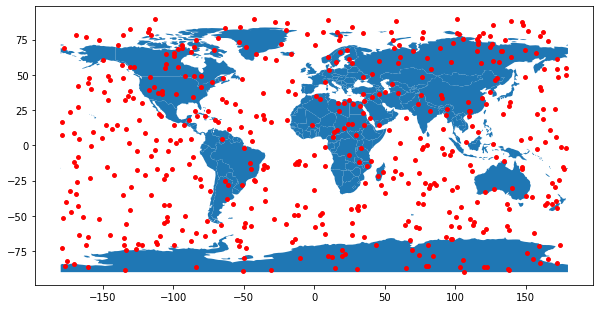

In [64]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(location['longitude'], location['latitude'])]
gdf = GeoDataFrame(location,geometry=geometry)  
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

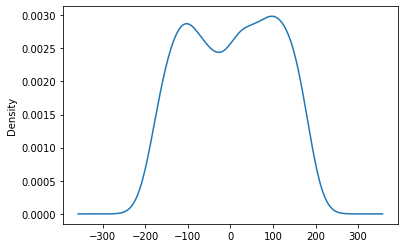

In [75]:
location['longitude'].sort_values().plot(kind='kde')